This is an exercise notebook for selection of candidates in Centre for Computational Brain Research (CCBR), IIT Madras

##(c) 2024 CCBR

---

[Candidate Name], [contact details], [batch/other details]

---
## Instructions
  
*   make a copy of this notebook
*   write your name as the first block of the copied notebook
*   complete the codes in the spaces below
*   share the saved notebook to [ -- email id here --]

## Good practices
*   avoid single alphabet variable names, use meaningful names
*   use typing in function signatures [https://docs.python.org/3/library/typing.html]
*   use lambdas, partials to improve readability [https://docs.python.org/3/library/functools.html]
*   use builtin datatypes as much as possible [https://docs.python.org/3/library/collections.html]
*   use exception handling [https://docs.python.org/3/tutorial/errors.html#handling-exceptions]
*   write docstring comments and inline comments to make the code self-explanatory


**PS**: These are individual exercises. In comments against your solutions, provide web links/blogs/documents that you used to solve the exercises. Do not use chatGPT

---
## Basic imports and data

In [ ]:
import skimage
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy

---
# **Basic python tasks**

### Task 1

1(a): Define a function named ```describe```, which returns the properties of the numpy array passed as argument. Use ```scipy.stats.describe```

The function should return an array of dicts which can be loaded in pandas

In [ ]:
# Your 1(a) solution

1(b): Call your function on the data loaded in previous section, wrap it in a pandas dataframe, and print the result

In [ ]:
# Your 1(b) solution

# Task 2

2(a): Define a function to flatten a nested dict (left to right in figure below)

The dict values can be string, numeric, or array of dict.

String and numeric are mandatory in your solution. **Implementation for array is bonus**.

In case of array, the output dict should have keys named using array position.

e.g if
```
"d":[
  {"e":v3,"f":v4},
  {"g":v5,"h":v6}
]

```
then flatten it as
```
"d.0.e":v3,
"d.0.f":v4,
"d.1.g":v5,
"d.1.h":v6
```

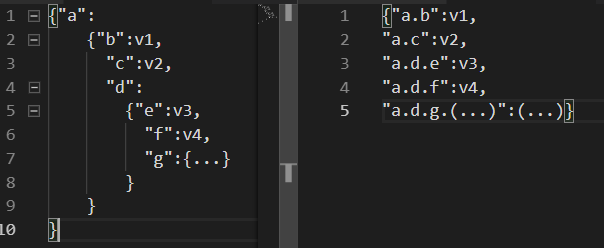

In [ ]:
# your solution 2(a) here

2(b): Define a function to unflatten (right to left of figure above).

Dict values can be string or numeric. implementation for array is bonus

In [ ]:
# your solution 2(b) here


# Task 3

Write a NumPy program to create a 3x3 identity matrix and stack it vertically and horizontally.

In [ ]:
# Your solution


---
# **Numpy/Scipy tasks**

# Task 4

Define a function to crop a square region from a given array, centered at a given r,c position, of given side length.

Your function should return the subarray, and rect (r1,c1,r2,c2), handling underflow and overflow

the rect should be such that
```
subarray = givenarray(r1:r2,c1:c2)
```

In [ ]:
def crop_array(arr:np.ndarray,pos:tuple,sidelen:int):
  # your solution here
  pass

# Task 5

5(b): Call your function by passing **data_2d_color**, and random points and side lengths

In [ ]:
data_2d_color = skimage.data.skin()
plt.imshow(data_2d_color)

# Task 6

Write a single expression to make the color dimension of data_2d_color come to the first dimension.

In [ ]:
# Your solution here


Show the shape of your result. Then write a single expression to revert color to third dimension. Verify by showing the shape and plt.imshow

In [ ]:
# Your solution here


# Task 7

7(a): Define a function to create a list of (r,c) that trace a semicircle. Use the function signature in the cell below

In [ ]:
from enum import Enum, auto

class Direction(Enum):
  UP=auto()
  DOWN=auto()
  LEFT=auto()
  RIGHT=auto()

def make_semicircle(cen_r:int=250, cen_c:int=250, rad:int=10, facing:Direction=Direction.UP):

  ptslist = []

  # your solution here


# Task 8

 Call the function make_semicircle with random cen_r and cen_c between 100 to 400, and with the returned ptslist, set the points in a zero array of dtype bool, and size (512,512). Use plt.imshow to confirm the result

Make sure to handle over- and underflows in ptslist wrt 512 x 512

In [ ]:
cen_r,cen_c = np.random.randint(100,400,2)
print(cen_r,cen_c)

ptslist = make_semicircle(cen_r,cen_c,200,Direction.RIGHT)

# your solution here

# Task 9

Generate a synthetic gradient image using NumPy and apply a basic threshold to create a binary image effect.

Modify the generate_gradient_image function to create a different gradient pattern.

Experiment with different threshold values in the apply_threshold function.

Add a function to compute and print the histogram of the original and thresholded images.

In [ ]:
def generate_gradient_image(size):
    """Generate a 2D gradient image of given size."""

    # Create a linear gradient image from 0 to 255
    x = np.linspace(0, 255, size[0])
    y = np.linspace(0, 255, size[1])
    xx, yy = np.meshgrid(x, y, indexing='ij')
    gradient_image = (xx + yy) / 2
    return gradient_image

def apply_threshold(image, threshold=127.5):

    """Apply a simple threshold to the image."""

    # Apply threshold
    binary_image = np.where(image > threshold, 255, 0)
    return binary_image

def display_images(original, modified):
    """Display the original and modified images."""
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Thresholded Image")
    plt.imshow(modified, cmap='gray')
    plt.axis('off')

    plt.show()

# Main execution
size = (256, 256)
original_image = generate_gradient_image(size)
thresholded_image = apply_threshold(original_image)

display_images(original_image, thresholded_image)


# Task 10 (Bonus)

# **Binary Path Sum**

A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

The path sum of a path is the sum of the node's values in the path.

Given the root of a binary tree, return the maximum path sum of any non-empty path.


**Example 1:**

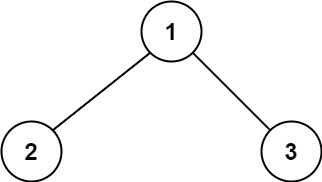

**Input: root** = [1,2,3]

**Output:** 6

**Explanation:** The optimal path is 2 -> 1 -> 3 with a path sum of 2 + 1 + 3 = 6.

**Example 2:**

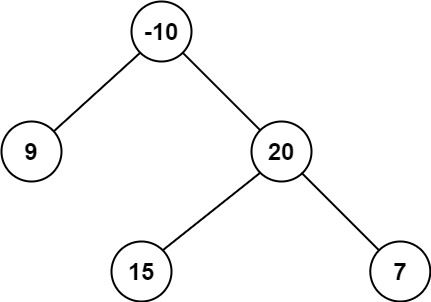

**Input: root** = [-10,9,20,null,null,15,7]

**Output:** 42

**Explanation:** The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxPathSum(self, root: Optional[TreeNode]) -> int:

